In [1]:
import os
import sys
import numpy as np
import pandas as pd

from datetime import datetime

import lightgbm as lgb

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
from src.paths import TRANSFORMED_DATA_DIR, RESIDUALS_DATA_DIR, VISUALIZATIONS_DIR
from src.evaluation import evaluate_metrics, save_metrics
from src.plot import plot_actual_predicted_scatter

In [4]:
df = pd.read_parquet(TRANSFORMED_DATA_DIR / 'tabular_data.parquet')
df

,rides_previous_672_hour,rides_previous_671_hour,rides_previous_670_hour,rides_previous_669_hour,rides_previous_668_hour,rides_previous_667_hour,rides_previous_666_hour,rides_previous_665_hour,rides_previous_664_hour,rides_previous_663_hour,...,rides_previous_7_hour,rides_previous_6_hour,rides_previous_5_hour,rides_previous_4_hour,rides_previous_3_hour,rides_previous_2_hour,rides_previous_1_hour,pickup_hour,pickup_location_id,target_rides_next_hour
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-29,1,0.0
1,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2023-01-30,1,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2023-01-31,1,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-02-01,1,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2023-02-02,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89300,1.0,0.0,2.0,0.0,0.0,3.0,3.0,0.0,3.0,2.0,...,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2023-12-27,265,3.0
89301,5.0,7.0,2.0,1.0,0.0,1.0,2.0,2.0,3.0,3.0,...,6.0,4.0,2.0,4.0,10.0,3.0,3.0,2023-12-28,265,1.0
89302,5.0,3.0,2.0,3.0,1.0,3.0,1.0,5.0,3.0,1.0,...,3.0,1.0,8.0,5.0,1.0,0.0,6.0,2023-12-29,265,5.0
89303,3.0,4.0,9.0,4.0,1.0,2.0,0.0,0.0,0.0,2.0,...,6.0,3.0,2.0,2.0,5.0,1.0,5.0,2023-12-30,265,2.0


In [5]:
from src.data_split import train_test_split

In [6]:
X_train, y_train, X_test, y_test = train_test_split(df, 
                                                    cutoff_date=datetime(2023, 6, 1, 0, 0, 0),
                                                    target_column_name='target_rides_next_hour')

In [7]:
print(f'Datasets shapes')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Datasets shapes
X_train: (32595, 674)
y_train: (32595,)
X_test: (56710, 674)
y_test: (56710,)


In [8]:
past_rides_columns = [col for col in X_train.columns if col.startswith('rides_')]
X_train_only_numeric = X_train[past_rides_columns]

In [9]:
print(X_train_only_numeric.shape)

(32595, 672)


In [10]:
X_train_only_numeric.head()

,rides_previous_672_hour,rides_previous_671_hour,rides_previous_670_hour,rides_previous_669_hour,rides_previous_668_hour,rides_previous_667_hour,rides_previous_666_hour,rides_previous_665_hour,rides_previous_664_hour,rides_previous_663_hour,...,rides_previous_10_hour,rides_previous_9_hour,rides_previous_8_hour,rides_previous_7_hour,rides_previous_6_hour,rides_previous_5_hour,rides_previous_4_hour,rides_previous_3_hour,rides_previous_2_hour,rides_previous_1_hour
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,...,0.0,5.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,...,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
model = lgb.LGBMRegressor(random_state=42)

In [12]:
model.fit(X_train_only_numeric, y_train)

LGBMRegressor(random_state=42)

In [13]:
X_test_only_numeric = X_test[past_rides_columns]
predictions = model.predict(X_test_only_numeric)

In [14]:
residuals = y_test - predictions

residuals.to_csv(RESIDUALS_DATA_DIR / 'residuals_lightgmb_1.csv', index=False)

In [15]:
metrics = evaluate_metrics(y_test, predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

MAE: 3.02
MSE: 137.03
RMSE: 11.71
SMAPE: 150.80
R: 0.95
R-squared: 0.91


In [16]:
model_name = 'LightGBMRegressor'
metrics['Model'] = model_name
save_metrics(metrics)

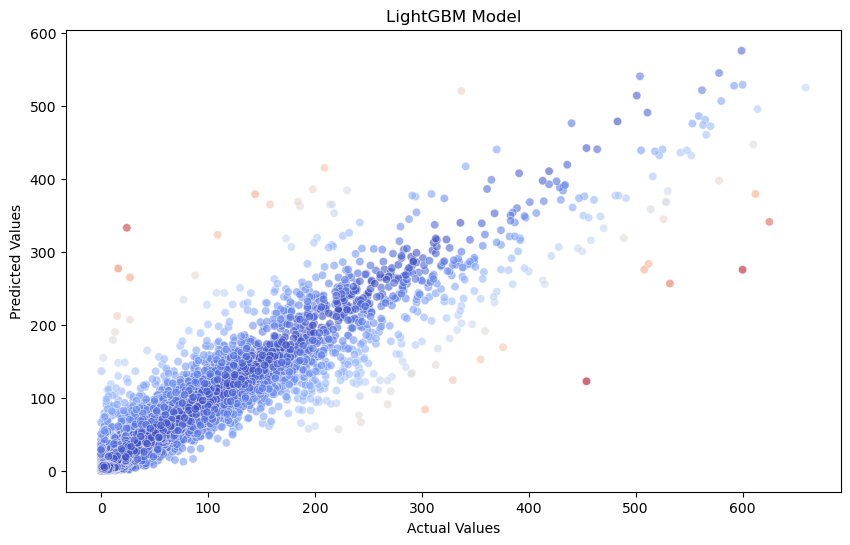

In [17]:
title = 'LightGBM Model'
file_name = 'lightgbm_scatter.png'
output_dir = VISUALIZATIONS_DIR

plot_actual_predicted_scatter(y_test, predictions, residuals, output_dir, title, file_name)